In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
#body_data = pd.read_csv(r'C:\python\datamining\DM_dataset\DM_dataset\regression_data\compresive_strength_concrete-easy\compresive_strength_concrete.csv') 
body_data = pd.read_csv(r'C:\python\datamining\Used_Cars_Price_Japan[62]\Used_Cars_Price_Japan.csv') 
body_data=body_data[['price','mark','model','year','mileage','engine_capacity','transmission',\
                 'drive','hand_drive','fuel']]
#body_data.columns=['Cement','Blast Furnace Slag','Fly Ash','Water','Superplasticizer','Coarse Aggregate','Fine Aggregate','Age','Concrete compressive strength',]
body_data

,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline
1,110,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline
2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline
3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline
4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline
...,...,...,...,...,...,...,...,...,...,...
2313,1400,toyota,vitz,2009,121000,996,at,2wd,rhd,gasoline
2314,1400,toyota,estima,2003,101000,3000,at,2wd,rhd,gasoline
2315,1400,subaru,r2,2005,101000,660,cvt,2wd,rhd,gasoline
2316,1400,honda,z,2000,170000,660,at,4wd,rhd,gasoline


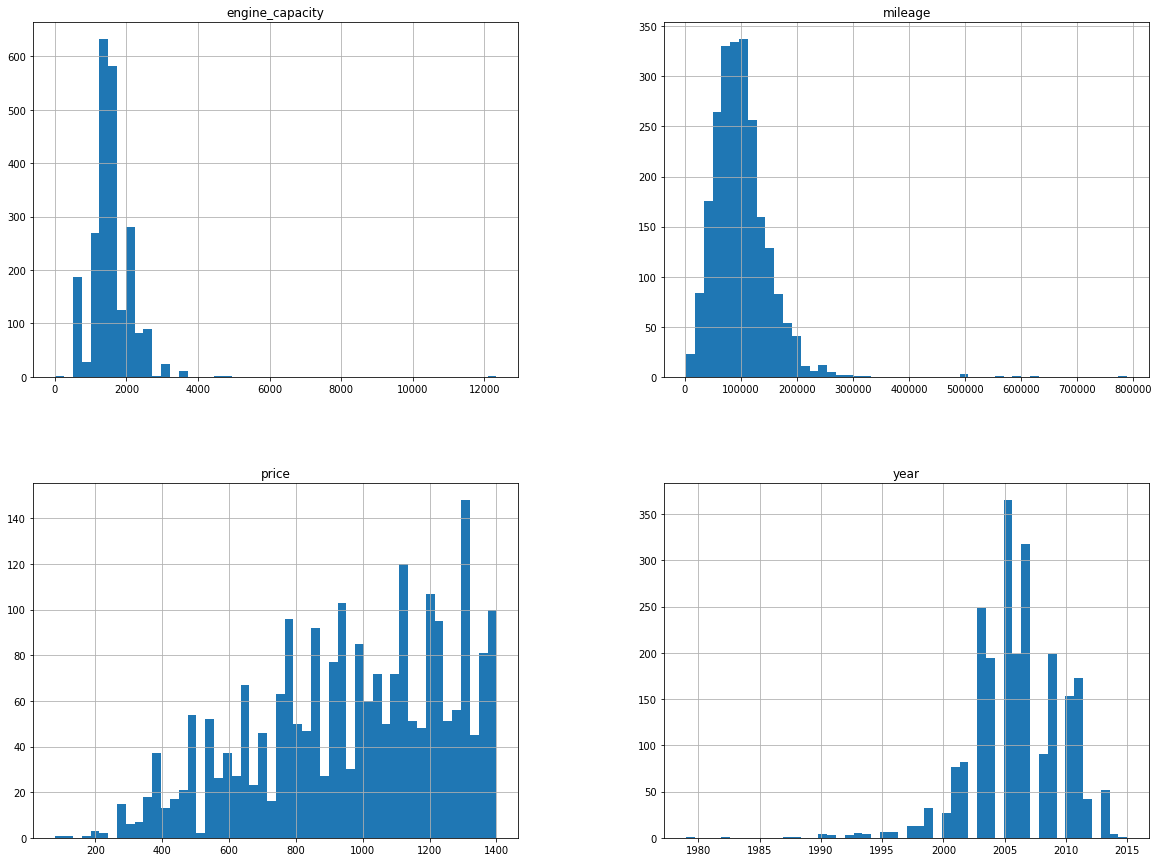

In [3]:
import matplotlib.pyplot as plt
body_data.hist(bins=50, figsize=(20,15))   # pandas DataFrame이 간단한 시각화 함수를 갖고 있음 
#save_fig("attribute_histogram_plots")
plt.show()

In [4]:
body_data.dropna(axis=0, inplace=True)
body_data.describe()

,price,year,mileage,engine_capacity
count,2318.000000,2318.000000,2318.000000,2318.000000
mean,971.522433,2005.972390,100013.194996,1507.010785
std,288.673112,3.698863,52512.478883,549.585170
min,80.000000,1979.000000,2000.000000,9.000000
25%,776.000000,2004.000000,67000.000000,1300.000000
50%,1000.000000,2006.000000,94000.000000,1490.000000
75%,1213.000000,2009.000000,124000.000000,1800.000000
max,1400.000000,2015.000000,790000.000000,12340.000000


In [5]:
body_data.corr()

,price,year,mileage,engine_capacity
price,1.000000,-0.211092,0.021581,0.173748
year,-0.211092,1.000000,0.086065,-0.142460
mileage,0.021581,0.086065,1.000000,0.130362
engine_capacity,0.173748,-0.142460,0.130362,1.000000


### Feature Engineering

In [6]:
# 자동차 회사명과 모델명을 name칼럼으로 합치고 없애기#
body_data['name'] = body_data['mark'] +"_"+ body_data['model']
features_drop = ['mark','model']
body_data = body_data.drop(features_drop, axis=1)
body_data=body_data[['price','name','year','mileage','engine_capacity','transmission','drive','hand_drive','fuel']]
body_data

,price,name,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,80,nissan_march,2003,80000,1240,at,2wd,rhd,gasoline
1,110,nissan_march,2010,53000,1200,at,2wd,rhd,gasoline
2,165,nissan_lafesta,2005,47690,2000,at,2wd,rhd,gasoline
3,190,toyota_avensis,2008,130661,1990,at,2wd,rhd,gasoline
4,190,daihatsu_mira,2006,66300,660,at,2wd,rhd,gasoline
...,...,...,...,...,...,...,...,...,...
2313,1400,toyota_vitz,2009,121000,996,at,2wd,rhd,gasoline
2314,1400,toyota_estima,2003,101000,3000,at,2wd,rhd,gasoline
2315,1400,subaru_r2,2005,101000,660,cvt,2wd,rhd,gasoline
2316,1400,honda_z,2000,170000,660,at,4wd,rhd,gasoline


In [7]:
## name 중 빈도수 높은것 찾기\
print("name -> ",np.unique(list(body_data.name)))
print(body_data['name'].value_counts().nlargest(50),"\n")

name ->  ['audi_a4' 'audi_a4 avant' 'bmw_1 series' 'bmw_3 series' 'bmw_mini'
 'bmw_mini cooper' 'chrysler_pt cruiser' 'citroen_xsara picasso'
 'daihatsu_atrai' 'daihatsu_atrai wagon' 'daihatsu_boon' 'daihatsu_coo'
 'daihatsu_esse' 'daihatsu_hijet cargo' 'daihatsu_hijet truck'
 'daihatsu_mira' 'daihatsu_mira avy' 'daihatsu_mira es'
 'daihatsu_miragino' 'daihatsu_move' 'daihatsu_move custom'
 'daihatsu_move latte' 'daihatsu_naked' 'daihatsu_tanto' 'daihatsu_terios'
 'daihatsu_terios kid' 'ford_escape' 'gm_chevrolet others' 'hino_dutro'
 'honda_accord' 'honda_acty truck' 'honda_acty van' 'honda_airwave'
 'honda_civic ferio' 'honda_civic hybrid' 'honda_cr-v' 'honda_edix'
 'honda_elysion' 'honda_fit' 'honda_fit hybrid' 'honda_fit shuttle'
 'honda_freed' 'honda_freed spike' 'honda_hr-v' 'honda_insight'
 'honda_inspire' 'honda_life' 'honda_mdx' 'honda_odyssey' 'honda_s-mx'
 'honda_step wgn' 'honda_stream' 'honda_vamos' 'honda_z' 'honda_zest'
 'hyundai_santa fe' 'hyundai_terracan' 'hyundai_tra

In [8]:
## 높은 빈도수를 가지는 name 별로 dataframe 생성
honda_fit_data=body_data[body_data['name'].isin(['honda_fit'])]
print(honda_fit_data)
toyota_vit_data=body_data[body_data['name'].isin(['toyota_vitz'])]
print(toyota_vit_data)
toyota_passo_data=body_data[body_data['name'].isin(['toyota_passo'])]
print(toyota_passo_data)

      price       name  year  mileage  engine_capacity transmission drive  \
53      370  honda_fit  2008    59484             1290           at   2wd   
57      378  honda_fit  2008   115131             1290           at   2wd   
91      398  honda_fit  2009    85495             1290           at   2wd   
92      399  honda_fit  2009   101620             1300           at   2wd   
108     430  honda_fit  2004   119600             1330           at   2wd   
...     ...        ...   ...      ...              ...          ...   ...   
2192   1360  honda_fit  2009   116000             1400           at   2wd   
2193   1360  honda_fit  2008   109000             1400           at   2wd   
2205   1370  honda_fit  2009   157000             1400           at   2wd   
2267   1389  honda_fit  2011   173000             1300           at   2wd   
2275   1390  honda_fit  2009   180000             1400           at   2wd   

     hand_drive      fuel  
53          rhd  gasoline  
57          rhd  ga

In [9]:
## 빈도수가 높은 name 3가지가 가지는 categorcial val 갯수확인
print(honda_fit_data['transmission'].value_counts(),"\n")
print(toyota_vit_data['transmission'].value_counts(),"\n")
print(toyota_passo_data['transmission'].value_counts(),"\n")
print(honda_fit_data['drive'].value_counts(),"\n")
print(toyota_vit_data['drive'].value_counts(),"\n")
print(toyota_passo_data['drive'].value_counts(),"\n")
print(honda_fit_data['hand_drive'].value_counts(),"\n")
print(toyota_vit_data['hand_drive'].value_counts(),"\n")
print(toyota_passo_data['hand_drive'].value_counts(),"\n")
print(honda_fit_data['fuel'].value_counts(),"\n")
print(toyota_vit_data['fuel'].value_counts(),"\n")
print(toyota_passo_data['fuel'].value_counts(),"\n")

at    269
mt      1
Name: transmission, dtype: int64 

at     161
cvt     13
mt       5
Name: transmission, dtype: int64 

at    127
Name: transmission, dtype: int64 

2wd    266
4wd      4
Name: drive, dtype: int64 

2wd    178
4wd      1
Name: drive, dtype: int64 

2wd    127
Name: drive, dtype: int64 

rhd    270
Name: hand_drive, dtype: int64 

rhd    179
Name: hand_drive, dtype: int64 

rhd    127
Name: hand_drive, dtype: int64 

gasoline    270
Name: fuel, dtype: int64 

gasoline    179
Name: fuel, dtype: int64 

gasoline    127
Name: fuel, dtype: int64 



In [10]:
## 갯수 차이가 많이 나는 categorical 변수 칼럼에서 삭제 -> 오버피팅이 발생할  수 있다.
features_drop = ['transmission','drive','hand_drive', 'fuel']
honda_fit_data = honda_fit_data.drop(features_drop, axis=1)
toyota_vit_data = toyota_vit_data.drop(features_drop, axis=1)
toyota_passo_data = toyota_passo_data.drop(features_drop, axis=1)

In [11]:
# .shape        
honda_fit_data.shape,toyota_vit_data.shape,toyota_passo_data.shape

((270, 5), (179, 5), (127, 5))

In [12]:
honda_fit_data,toyota_vit_data,toyota_passo_data

(      price       name  year  mileage  engine_capacity
 53      370  honda_fit  2008    59484             1290
 57      378  honda_fit  2008   115131             1290
 91      398  honda_fit  2009    85495             1290
 92      399  honda_fit  2009   101620             1300
 108     430  honda_fit  2004   119600             1330
 ...     ...        ...   ...      ...              ...
 2192   1360  honda_fit  2009   116000             1400
 2193   1360  honda_fit  2008   109000             1400
 2205   1370  honda_fit  2009   157000             1400
 2267   1389  honda_fit  2011   173000             1300
 2275   1390  honda_fit  2009   180000             1400
 
 [270 rows x 5 columns],
       price         name  year  mileage  engine_capacity
 55      375  toyota_vitz  2007   128317             1000
 56      375  toyota_vitz  2007   127614             1000
 164     490  toyota_vitz  2007    82000             1000
 212     541  toyota_vitz  2007    62538             1000
 241     55

In [13]:
honda_fit_data.corr(),toyota_vit_data.corr(),toyota_passo_data.corr()

(                    price      year   mileage  engine_capacity
 price            1.000000 -0.049051  0.062857         0.137391
 year            -0.049051  1.000000  0.297757        -0.145586
 mileage          0.062857  0.297757  1.000000        -0.005285
 engine_capacity  0.137391 -0.145586 -0.005285         1.000000,
                     price      year   mileage  engine_capacity
 price            1.000000 -0.082120 -0.093967         0.179736
 year            -0.082120  1.000000 -0.083308        -0.023035
 mileage         -0.093967 -0.083308  1.000000        -0.118929
 engine_capacity  0.179736 -0.023035 -0.118929         1.000000,
                     price      year   mileage  engine_capacity
 price            1.000000 -0.356811 -0.115190         0.353661
 year            -0.356811  1.000000  0.209928        -0.276545
 mileage         -0.115190  0.209928  1.000000        -0.006050
 engine_capacity  0.353661 -0.276545 -0.006050         1.000000)

### OLS모델 생성

In [14]:
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

### honda_fit_data OLS

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     5.156
Date:                Wed, 03 Jun 2020   Prob (F-statistic):             0.0240
Time:                        16:52:02   Log-Likelihood:                -1859.2
No. Observations:                 270   AIC:                             3722.
Df Residuals:                     268   BIC:                             3730.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         344.6491    270.266     

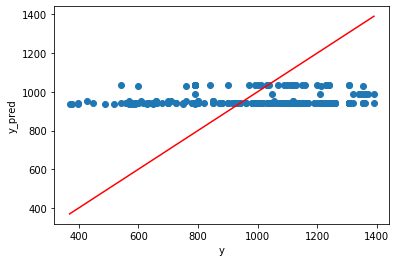

R ->  0.019
n ->  270 p ->  1
adj_r2 ->  0.015339552238805898
SSE -> 15131613.867124857 SSR -> 291125.3958381265 SST -> 15422739.262962984
MSE -> 56461.245772853945 MSR -> 291125.3958381265
f -> 5.156198589902473
pvalue - > 0.023957315107310584


In [15]:
#### OLS만들기
features = "engine_capacity"
y, X = dmatrices("price ~" +features, data=honda_fit_data, return_type="dataframe")

# For each Xi, calculate VIF
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Fit X to y
result = sm.OLS(y, X).fit()
print(result.summary())


##### VIF 구하기
features = "year+mileage+engine_capacity"
y, X = dmatrices("price ~" +features, data=honda_fit_data, return_type="dataframe")

#For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif.round(1))

##### 모델 만들기
X, y = honda_fit_data.iloc[:,4:], honda_fit_data.iloc[:,0]
print(X.shape, y.shape)

from sklearn.linear_model import LinearRegression
#모델 객체 생성
m_reg = LinearRegression(fit_intercept = True) #fit_intercept -> beta0 생성 여부

#모델 학습
m_reg.fit(X, y) 

print(m_reg.intercept_)
print(m_reg.coef_)

# 선형 모델의 절편값 β0 # 추정된 상수항
beta0 = m_reg.intercept_

# 선형 모델의 기울기값 β1 # 추정된 가중치 벡터
beta1 = m_reg.coef_
print('y = {} + {} x1 '.format(round(beta0,3), round(beta1[0],3)))

## 예측 및  성능확인
y_pred = m_reg.predict(X)
#print(y_pred)
#print(np.round(list(y_pred),3)) # 27개
#print(np.round(m_reg.score(X, y),3))

# 실측치y와 예측치y의 관계성 #
plt.scatter(y, y_pred)
line = np.linspace(min(y.values), max(y.values), 1000)
plt.plot(line, line, color = 'r')
plt.xlabel('y')
plt.ylabel('y_pred')
plt.show()

from sklearn.metrics import r2_score as r2
# 결정계수 
r2 = np.round(r2(y, y_pred),3)
print("R -> ",r2)

# 조정된 결정계수 #
n, p = honda_fit_data.iloc[:,4:].shape
print("n -> ",n,"p -> ",p)
adj_r2 = 1 - ((1-r2) * (n-1)) / (n-p-1)
print("adj_r2 -> ",adj_r2)

# Sum of Square Error
SSE = sum((y-y_pred)**2)

# Sum of Square Regression
SSR = sum((y_pred-np.mean(y))**2)

SST = SSE + SSR

print("SSE ->",SSE,"SSR ->",SSR,"SST ->",SST)

# mean square error / 회귀로 예측해도 좁힐 수 없는 관측값과의 차이가 얼마나 있는지 말해주는 수치
MSE=SSE/(n-p-1)

# regression mean square:평균으로 말하는 것과 회귀로 예측해서 말하는 것의 차이가 얼마나 있는지를 말해주는 수치
MSR=SSR/p

print("MSE ->",MSE,"MSR ->",MSR)

# f분포 하에서 관찰한 값이 얼마나 이상한지 아닌지, 보기힘든건지 아닌지 판단
# 즉 모형의 적합성을 판단하기 위해 f의 수치를 확인
# 공식: 독립변수(X)로 의해 설명된 variation(MSR) / 독립변수(X)로 의해 설명되지 못한 variation(MSE) 
f=MSR/MSE
print("f ->",f)

# 수치해석기능을 제공하는 파이썬 패키지
# stats 서브패키지는 확률분포 분석을 위한 다양한 기능을 제공
from scipy import stats

# pvalue로 기각할지 선정 
# cdf(cumulative distribution function: 누적분포함수)
# 회귀분석은 F-통계량에 대한 우측검정으로 가설을 검정
pvalue = 1-stats.f.cdf(f,p,n-p-1) # f값이 x임 # df은 분자, 분모 순서대로 넣기 -> "pvalue"
print('pvalue - >',pvalue)

### toyota_vit_data OLS

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     5.909
Date:                Wed, 03 Jun 2020   Prob (F-statistic):             0.0161
Time:                        16:52:02   Log-Likelihood:                -1224.6
No. Observations:                 179   AIC:                             2453.
Df Residuals:                     177   BIC:                             2460.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         716.1968    122.468     

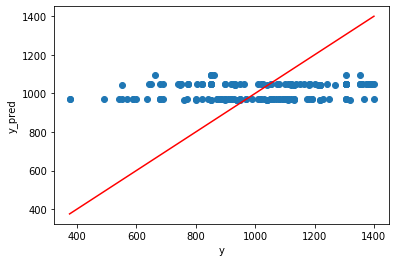

R ->  0.032
n ->  270 p ->  1
adj_r2 ->  0.028388059701492607
SSE -> 9180991.88894041 SSR -> 306495.10547300143 SST -> 9487486.994413411
MSE -> 34257.43242141944 MSR -> 306495.10547300143
f -> 8.946820698721295
pvalue - > 0.0030382322458430977


In [16]:
features = "engine_capacity"
y, X = dmatrices("price ~" +features, data=toyota_vit_data, return_type="dataframe")

# For each Xi, calculate VIF
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Fit X to y
result = sm.OLS(y, X).fit()
print(result.summary())

features = "year+mileage+engine_capacity"
y, X = dmatrices("price ~" +features, data=toyota_vit_data, return_type="dataframe")

#For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif.round(1))

##### 모델 만들기
X, y = toyota_vit_data.iloc[:,4:], toyota_vit_data.iloc[:,0]
print(X.shape, y.shape)

from sklearn.linear_model import LinearRegression
#모델 객체 생성
m_reg = LinearRegression(fit_intercept = True) #fit_intercept -> beta0 생성 여부

#모델 학습
m_reg.fit(X, y) 

print(m_reg.intercept_)
print(m_reg.coef_)

# 선형 모델의 절편값 β0 # 추정된 상수항
beta0 = m_reg.intercept_

# 선형 모델의 기울기값 β1 # 추정된 가중치 벡터
beta1 = m_reg.coef_
print('y = {} + {} x1 '.format(round(beta0,3), round(beta1[0],3)))

## 예측 및  성능확인
y_pred = m_reg.predict(X)
#print(y_pred)
#print(np.round(list(y_pred),3)) # 27개
#print(np.round(m_reg.score(X, y),3))

# 실측치y와 예측치y의 관계성 #
plt.scatter(y, y_pred)
line = np.linspace(min(y.values), max(y.values), 1000)
plt.plot(line, line, color = 'r')
plt.xlabel('y')
plt.ylabel('y_pred')
plt.show()

from sklearn.metrics import r2_score as r2
# 결정계수 
r2 = np.round(r2(y, y_pred),3)
print("R -> ",r2)

# 조정된 결정계수 #
n, p = honda_fit_data.iloc[:,4:].shape
print("n -> ",n,"p -> ",p)
adj_r2 = 1 - ((1-r2) * (n-1)) / (n-p-1)
print("adj_r2 -> ",adj_r2)

# Sum of Square Error
SSE = sum((y-y_pred)**2)

# Sum of Square Regression
SSR = sum((y_pred-np.mean(y))**2)

SST = SSE + SSR

print("SSE ->",SSE,"SSR ->",SSR,"SST ->",SST)

# mean square error / 회귀로 예측해도 좁힐 수 없는 관측값과의 차이가 얼마나 있는지 말해주는 수치
MSE=SSE/(n-p-1)

# regression mean square:평균으로 말하는 것과 회귀로 예측해서 말하는 것의 차이가 얼마나 있는지를 말해주는 수치
MSR=SSR/p

print("MSE ->",MSE,"MSR ->",MSR)

# f분포 하에서 관찰한 값이 얼마나 이상한지 아닌지, 보기힘든건지 아닌지 판단
# 즉 모형의 적합성을 판단하기 위해 f의 수치를 확인
# 공식: 독립변수(X)로 의해 설명된 variation(MSR) / 독립변수(X)로 의해 설명되지 못한 variation(MSE) 
f=MSR/MSE
print("f ->",f)

# 수치해석기능을 제공하는 파이썬 패키지
# stats 서브패키지는 확률분포 분석을 위한 다양한 기능을 제공
from scipy import stats

# pvalue로 기각할지 선정 
# cdf(cumulative distribution function: 누적분포함수)
# 회귀분석은 F-통계량에 대한 우측검정으로 가설을 검정
pvalue = 1-stats.f.cdf(f,p,n-p-1) # f값이 x임 # df은 분자, 분모 순서대로 넣기 -> "pvalue"
print('pvalue - >',pvalue)

### toyota_passo_data OLS

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     15.28
Date:                Wed, 03 Jun 2020   Prob (F-statistic):           1.17e-06
Time:                        16:52:02   Log-Likelihood:                -882.78
No. Observations:                 127   AIC:                             1772.
Df Residuals:                     124   BIC:                             1780.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        6.826e+04   2.04e+04     

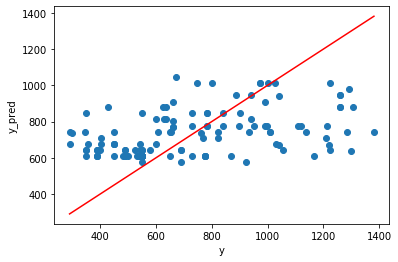

R ->  0.198
n ->  270 p ->  1
adj_r2 ->  0.1950074626865672
SSE -> 8107516.712539647 SSR -> 1998031.1457280624 SST -> 10105547.85826771
MSE -> 30251.928031864354 MSR -> 1998031.1457280624
f -> 66.04640681491561
pvalue - > 1.63202784619898e-14


In [17]:
features = "year+engine_capacity"
y, X = dmatrices("price ~" +features, data=toyota_passo_data, return_type="dataframe")

# For each Xi, calculate VIF
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Fit X to y
result = sm.OLS(y, X).fit()
print(result.summary())

features = "year+engine_capacity"
y, X = dmatrices("price ~" +features, data=toyota_passo_data, return_type="dataframe")

#For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif.round(1))

toyota_passo_data.drop('mileage', axis=1, inplace=True)
print(toyota_passo_data)

##### 모델 만들기
X, y = toyota_passo_data.iloc[:,2:], toyota_passo_data.iloc[:,0]
print(X.shape, y.shape)

from sklearn.linear_model import LinearRegression
#모델 객체 생성
m_reg = LinearRegression(fit_intercept = True) #fit_intercept -> beta0 생성 여부

#모델 학습
m_reg.fit(X, y) 

print(m_reg.intercept_)
print(m_reg.coef_)

# 선형 모델의 절편값 β0 # 추정된 상수항
beta0 = m_reg.intercept_

# 선형 모델의 기울기값 β1 # 추정된 가중치 벡터
beta1 = m_reg.coef_
print('y = {} + {} x1 + {} x2  '.format(round(beta0,3), round(beta1[0],3), round(beta1[1],3) ))

## 예측 및  성능확인
y_pred = m_reg.predict(X)
#print(y_pred)
#print(np.round(list(y_pred),3)) # 27개
#print(np.round(m_reg.score(X, y),3))

# 실측치y와 예측치y의 관계성 #
plt.scatter(y, y_pred)
line = np.linspace(min(y.values), max(y.values), 1000)
plt.plot(line, line, color = 'r')
plt.xlabel('y')
plt.ylabel('y_pred')
plt.show()

from sklearn.metrics import r2_score as r2
# 결정계수 
r2 = np.round(r2(y, y_pred),3)
print("R -> ",r2)

# 조정된 결정계수 #
n, p = honda_fit_data.iloc[:,4:].shape
print("n -> ",n,"p -> ",p)
adj_r2 = 1 - ((1-r2) * (n-1)) / (n-p-1)
print("adj_r2 -> ",adj_r2)

# Sum of Square Error
SSE = sum((y-y_pred)**2)

# Sum of Square Regression
SSR = sum((y_pred-np.mean(y))**2)

SST = SSE + SSR

print("SSE ->",SSE,"SSR ->",SSR,"SST ->",SST)

# mean square error / 회귀로 예측해도 좁힐 수 없는 관측값과의 차이가 얼마나 있는지 말해주는 수치
MSE=SSE/(n-p-1)

# regression mean square:평균으로 말하는 것과 회귀로 예측해서 말하는 것의 차이가 얼마나 있는지를 말해주는 수치
MSR=SSR/p

print("MSE ->",MSE,"MSR ->",MSR)

# f분포 하에서 관찰한 값이 얼마나 이상한지 아닌지, 보기힘든건지 아닌지 판단
# 즉 모형의 적합성을 판단하기 위해 f의 수치를 확인
# 공식: 독립변수(X)로 의해 설명된 variation(MSR) / 독립변수(X)로 의해 설명되지 못한 variation(MSE) 
f=MSR/MSE
print("f ->",f)

# 수치해석기능을 제공하는 파이썬 패키지
# stats 서브패키지는 확률분포 분석을 위한 다양한 기능을 제공
from scipy import stats

# pvalue로 기각할지 선정 
# cdf(cumulative distribution function: 누적분포함수)
# 회귀분석은 F-통계량에 대한 우측검정으로 가설을 검정
pvalue = 1-stats.f.cdf(f,p,n-p-1) # f값이 x임 # df은 분자, 분모 순서대로 넣기 -> "pvalue"
print('pvalue - >',pvalue)